<a href="https://colab.research.google.com/github/Lionel-Lim/casa0018/blob/main/casa0018/Assessment/Projects/Final%20Project/src/trainingData/test_3/trainingModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import Sequence

In [ ]:
from google.colab.output import eval_js
eval_js('google.colab.output.setIframeHeight("500")')

In [ ]:
!wget https://raw.githubusercontent.com/Lionel-Lim/casa0018/main/Assessment/Projects/Final%20Project/src/trainingData/test_3/test_3.zip
!unzip dataset_ce.zip

--2023-03-16 00:31:06--  https://github.com/Lionel-Lim/casa0018/raw/main/Assessment/Projects/Final%20Project/src/trainingData/CELab/dataset_ce.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Lionel-Lim/casa0018/main/Assessment/Projects/Final%20Project/src/trainingData/CELab/dataset_ce.zip [following]
--2023-03-16 00:31:06--  https://raw.githubusercontent.com/Lionel-Lim/casa0018/main/Assessment/Projects/Final%20Project/src/trainingData/CELab/dataset_ce.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35716648 (34M) [application/zip]
Saving to: ‘dataset_ce.zip’

dataset_ce.zip      100%[===

In [ ]:
# Define the headers
headers = ['timestamp', 'status', 'orientation', 'position', 'acceleration']

# Load the dataset from CSV file with headers
df = pd.read_csv('/content/filteredData.csv', header=None, names=headers)

# Calculate the index corresponding to 80% of the data
eighty_percent_index = int(0.8 * len(df))

# Select only the first 80% of the data
df = df.iloc[:eighty_percent_index]

df

,timestamp,status,orientation,position,acceleration
0,6065.121521,TRACKING,0.47358594844755286/-0.573374133489474/0.52357...,0.01727324296350935/0.07122331782399083/-0.018...,-0.00027192355963771657/-7.185414149164127e-05...
1,6065.523589,TRACKING,0.4853048270483177/-0.5737225433143196/0.51828...,0.02920770433270109/0.07672926717639975/-0.080...,-9.105238481981861e-05/-2.406003713216747e-05/...
2,6065.924731,TRACKING,0.484051613984158/-0.5795324981207497/0.495422...,0.03746951033899711/0.09035132280263829/-0.107...,-0.00581407523758414/-0.0015363339069296056/-0...
3,6066.124442,TRACKING,0.5107305502202182/-0.5626244813616497/0.49506...,0.030208211707954603/0.08139159834573186/-0.13...,-0.0005554415804080121/-0.00014677204859391818...
4,6066.324221,TRACKING,0.5183562657535402/-0.5567259827776445/0.49508...,0.014175847986693862/0.08653478773312466/-0.09...,-0.00014362037037599258/-3.795080657162419e-05...
...,...,...,...,...,...
885,6243.453851,TRACKING,0.22521928442540065/-0.5031371747356775/-0.718...,7.085800050088621/9.602377798049762/-0.4346610...,-0.06880298469449944/-0.018180768903850713/-0....
886,6243.653558,TRACKING,0.18529270858260943/-0.4337027106169437/-0.756...,7.008837854177696/9.534957839269914/-0.4712783...,-0.03435975913578426/-0.009079356705430955/-0....
887,6243.821043,TRACKING,0.1620960354079134/-0.39111809660412833/-0.777...,6.972199094433523/9.477561941895493/-0.4734256...,-0.01987406335922443/-0.005251599981002467/-0....
888,6244.053206,TRACKING,0.14311496082618022/-0.3457940296814823/-0.789...,6.90265747785302/9.363295592619652/-0.46893350...,-0.009909607194511144/-0.002618553237643875/-0...


In [ ]:
# Add a new column for the depth images
df['depth_image'] = None
# Load the depth images and add them to the DataFrame
for i, row in df.iterrows():
    # Get the timestamp and image file name
    timestamp = row['timestamp']
    image_name = f"{i+1}_{timestamp}.png"
    
    # Load the image and convert it to a numpy array
    image_path = os.path.join('/content/filtered/', image_name)
    image = Image.open(image_path)
    # Convert the image to a numpy array
    image_array = np.array(image)
    # Reshape the array to have the correct dimensions
    image_array = image_array.reshape((1, 400, 640, 1))

    # Squeeze the array to remove the first dimension and get a 2D array
    image_array = image_array.squeeze()

    # Add the image array to the DataFrame
    df.at[i, 'depth_image'] = image_array

In [ ]:
# Split the orientation column into four separate columns
df[['ori_w', 'ori_x', 'ori_y', 'ori_z']] = df['orientation'].str.split('/', expand=True)

# Split the position column into three separate columns
df[['pos_x', 'pos_y', 'pos_z']] = df['position'].str.split('/', expand=True)

# Split the acceleration column into three separate columns
df[['acc_x', 'acc_y', 'acc_z']] = df['acceleration'].str.split('/', expand=True)

# Convert the data types of the columns to float32
df = df.astype({'ori_w': 'float32', 'ori_x': 'float32', 'ori_y': 'float32', 'ori_z': 'float32', 'pos_x': 'float32', 'pos_y': 'float32', 'pos_z': 'float32', 'acc_x': 'float32', 'acc_y': 'float32', 'acc_z': 'float32'})
df['depth_image'] = df['depth_image'].apply(lambda x: x.astype('float32'))

# Find the global maximum pixel value across all depth images
global_max_pixel_value = np.max([np.max(img) for img in df['depth_image']])

# Normalize all depth images using the global maximum pixel value
df['normalized_depth_image'] = df['depth_image'].apply(lambda img: img / global_max_pixel_value)

df

,timestamp,status,orientation,position,acceleration,depth_image,ori_w,ori_x,ori_y,ori_z,pos_x,pos_y,pos_z,acc_x,acc_y,acc_z,normalized_depth_image
0,6065.121521,TRACKING,0.47358594844755286/-0.573374133489474/0.52357...,0.01727324296350935/0.07122331782399083/-0.018...,-0.00027192355963771657/-7.185414149164127e-05...,"[[2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0.473586,-0.573374,0.523575,-0.415725,0.017273,0.071223,-0.018132,-0.000272,-0.000072,-0.000015,"[[0.008583691, 0.008583691, 0.008583691, 0.008..."
1,6065.523589,TRACKING,0.4853048270483177/-0.5737225433143196/0.51828...,0.02920770433270109/0.07672926717639975/-0.080...,-9.105238481981861e-05/-2.406003713216747e-05/...,"[[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0,...",0.485305,-0.573723,0.518285,-0.408292,0.029208,0.076729,-0.080103,-0.000091,-0.000024,-0.000005,"[[0.012875536, 0.012875536, 0.012875536, 0.012..."
2,6065.924731,TRACKING,0.484051613984158/-0.5795324981207497/0.495422...,0.03746951033899711/0.09035132280263829/-0.107...,-0.00581407523758414/-0.0015363339069296056/-0...,"[[2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,...",0.484052,-0.579533,0.495423,-0.429410,0.037470,0.090351,-0.107573,-0.005814,-0.001536,-0.000321,"[[0.008583691, 0.012875536, 0.008583691, 0.008..."
3,6066.124442,TRACKING,0.5107305502202182/-0.5626244813616497/0.49506...,0.030208211707954603/0.08139159834573186/-0.13...,-0.0005554415804080121/-0.00014677204859391818...,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0,...",0.510731,-0.562624,0.495064,-0.421332,0.030208,0.081392,-0.133791,-0.000555,-0.000147,-0.000031,"[[0.0042918455, 0.0042918455, 0.0042918455, 0...."
4,6066.324221,TRACKING,0.5183562657535402/-0.5567259827776445/0.49508...,0.014175847986693862/0.08653478773312466/-0.09...,-0.00014362037037599258/-3.795080657162419e-05...,"[[0.0, 0.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,...",0.518356,-0.556726,0.495088,-0.419823,0.014176,0.086535,-0.095369,-0.000144,-0.000038,-0.000008,"[[0.0, 0.0, 0.0042918455, 0.008583691, 0.00858..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,6243.453851,TRACKING,0.22521928442540065/-0.5031371747356775/-0.718...,7.085800050088621/9.602377798049762/-0.4346610...,-0.06880298469449944/-0.018180768903850713/-0....,"[[6.0, 6.0, 6.0, 5.0, 4.0, 4.0, 3.0, 3.0, 3.0,...",0.225219,-0.503137,-0.718490,0.424148,7.085800,9.602378,-0.434661,-0.068803,-0.018181,-0.003803,"[[0.025751073, 0.025751073, 0.025751073, 0.021..."
886,6243.653558,TRACKING,0.18529270858260943/-0.4337027106169437/-0.756...,7.008837854177696/9.534957839269914/-0.4712783...,-0.03435975913578426/-0.009079356705430955/-0....,"[[13.0, 13.0, 13.0, 14.0, 16.0, 17.0, 18.0, 18...",0.185293,-0.433703,-0.756767,0.452628,7.008838,9.534958,-0.471278,-0.034360,-0.009079,-0.001899,"[[0.055793993, 0.055793993, 0.055793993, 0.060..."
887,6243.821043,TRACKING,0.1620960354079134/-0.39111809660412833/-0.777...,6.972199094433523/9.477561941895493/-0.4734256...,-0.01987406335922443/-0.005251599981002467/-0....,"[[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,...",0.162096,-0.391118,-0.777893,0.464364,6.972199,9.477562,-0.473426,-0.019874,-0.005252,-0.001099,"[[0.008583691, 0.008583691, 0.008583691, 0.008..."
888,6244.053206,TRACKING,0.14311496082618022/-0.3457940296814823/-0.789...,6.90265747785302/9.363295592619652/-0.46893350...,-0.009909607194511144/-0.002618553237643875/-0...,"[[2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0,...",0.143115,-0.345794,-0.789042,0.487193,6.902658,9.363296,-0.468933,-0.009910,-0.002619,-0.000548,"[[0.008583691, 0.008583691, 0.0042918455, 0.00..."


In [ ]:
df.corr()

,timestamp,ori_w,ori_x,ori_y,ori_z,pos_x,pos_y,pos_z,acc_x,acc_y,acc_z
timestamp,1.000000,-0.073346,-0.045565,-0.209717,0.149219,0.066128,-0.031745,-0.622128,-0.118595,-0.118595,-0.118595
ori_w,-0.073346,1.000000,-0.958789,0.173676,-0.028528,-0.075769,-0.185219,0.348854,-0.070911,-0.070911,-0.070911
ori_x,-0.045565,-0.958789,1.000000,-0.033877,-0.120788,0.077235,0.168375,-0.255082,0.117325,0.117325,0.117325
ori_y,-0.209717,0.173676,-0.033877,1.000000,-0.974795,-0.101924,-0.083533,0.327066,0.096752,0.096752,0.096752
ori_z,0.149219,-0.028528,-0.120788,-0.974795,1.000000,0.082267,0.078663,-0.241340,-0.107411,-0.107411,-0.107411
pos_x,0.066128,-0.075769,0.077235,-0.101924,0.082267,1.000000,0.616405,0.046782,-0.071092,-0.071092,-0.071092
pos_y,-0.031745,-0.185219,0.168375,-0.083533,0.078663,0.616405,1.000000,0.007708,0.061149,0.061149,0.061149
pos_z,-0.622128,0.348854,-0.255082,0.327066,-0.241340,0.046782,0.007708,1.000000,0.081643,0.081643,0.081643
acc_x,-0.118595,-0.070911,0.117325,0.096752,-0.107411,-0.071092,0.061149,0.081643,1.000000,1.000000,1.000000
acc_y,-0.118595,-0.070911,0.117325,0.096752,-0.107411,-0.071092,0.061149,0.081643,1.000000,1.000000,1.000000


In [ ]:
# Convert the depth image data to a 4D numpy array of shape (num_samples, 400, 640, 1)
depth_data = np.stack(df['normalized_depth_image'].to_numpy(), axis=0).reshape(-1, 400, 640)

# Convert the orientation data to a numpy array
ori_data = df[['ori_w', 'ori_x', 'ori_y', 'ori_z']].to_numpy()

# Convert the orientation data to a numpy array
acc_data = df[['acc_x', 'acc_y', 'acc_z']].to_numpy()

# Convert the current position data to a numpy array
curr_pos_data = df[['pos_x', 'pos_y', 'pos_z']].to_numpy()

In [ ]:
# Split the data into training, validation, and test sets
train_depth, test_depth, train_ori, test_ori, train_acc, test_acc, train_curr_pos, test_curr_pos = train_test_split(
    depth_data, ori_data, acc_data, curr_pos_data, test_size=0.2, random_state=42)

train_depth, val_depth, train_ori, val_ori, train_acc, val_acc, train_curr_pos, val_curr_pos = train_test_split(
    train_depth, train_ori, train_acc, train_curr_pos, test_size=0.2, random_state=42)

# Print the shapes of the data sets
print(f'Training data shapes: depth={train_depth.shape}, ori={train_ori.shape}, acc={train_acc.shape}, curr_pos={train_curr_pos.shape}')
print(f'Validation data shapes: depth={val_depth.shape}, ori={val_ori.shape}, acc={val_acc.shape}, curr_pos={val_curr_pos.shape}')
print(f'Testing data shapes: depth={test_depth.shape}, ori={test_ori.shape}, acc={test_acc.shape}, curr_pos={test_curr_pos.shape}')

Training data shapes: depth=(569, 400, 640), ori=(569, 4), acc=(569, 3), curr_pos=(569, 3)
Validation data shapes: depth=(143, 400, 640), ori=(143, 4), acc=(143, 3), curr_pos=(143, 3)
Testing data shapes: depth=(178, 400, 640), ori=(178, 4), acc=(178, 3), curr_pos=(178, 3)


In [ ]:
# Calculate indices for splitting the data
num_samples = len(depth_data)
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

train_end_idx = int(train_ratio * num_samples)
val_end_idx = int((train_ratio + val_ratio) * num_samples)

# Split the data into training, validation, and test sets
train_depth = depth_data[:train_end_idx]
train_ori = ori_data[:train_end_idx]
train_acc = acc_data[:train_end_idx]
train_curr_pos = curr_pos_data[:train_end_idx]

val_depth = depth_data[train_end_idx:val_end_idx]
val_ori = ori_data[train_end_idx:val_end_idx]
val_acc = acc_data[train_end_idx:val_end_idx]
val_curr_pos = curr_pos_data[train_end_idx:val_end_idx]

test_depth = depth_data[val_end_idx:]
test_ori = ori_data[val_end_idx:]
test_acc = acc_data[val_end_idx:]
test_curr_pos = curr_pos_data[val_end_idx:]

# Print the shapes of the data sets
print(f'Training data shapes: depth={train_depth.shape}, ori={train_ori.shape}, acc={train_acc.shape}, curr_pos={train_curr_pos.shape}')
print(f'Validation data shapes: depth={val_depth.shape}, ori={val_ori.shape}, acc={val_acc.shape}, curr_pos={val_curr_pos.shape}')
print(f'Testing data shapes: depth={test_depth.shape}, ori={test_ori.shape}, acc={test_acc.shape}, curr_pos={test_curr_pos.shape}')

Training data shapes: depth=(712, 400, 640), ori=(712, 4), acc=(712, 3), curr_pos=(712, 3)
Validation data shapes: depth=(89, 400, 640), ori=(89, 4), acc=(89, 3), curr_pos=(89, 3)
Testing data shapes: depth=(89, 400, 640), ori=(89, 4), acc=(89, 3), curr_pos=(89, 3)


In [ ]:
# Function to generate time series data
def generate_time_series_data(data, n_steps):
    num_samples, num_features = data.shape
    X = np.zeros((num_samples - n_steps + 1, n_steps, num_features))
    
    for i in range(num_samples - n_steps + 1):
        X[i] = data[i:i + n_steps]
    
    return X
  
# Define the number of time steps
n_steps = 10

# Combine orientation and acceleration data
train_other_data = np.concatenate([train_ori, train_acc], axis=1)
val_other_data = np.concatenate([val_ori, val_acc], axis=1)
test_other_data = np.concatenate([test_ori, test_acc], axis=1)

# Generate time series data for orientation and acceleration
train_other_data_time_series = generate_time_series_data(train_other_data, n_steps)
val_other_data_time_series = generate_time_series_data(val_other_data, n_steps)
test_other_data_time_series = generate_time_series_data(test_other_data, n_steps)

# Update position data to match the time series data
train_curr_pos_time_series = train_curr_pos[n_steps - 1:]
val_curr_pos_time_series = val_curr_pos[n_steps - 1:]
test_curr_pos_time_series = test_curr_pos[n_steps - 1:]

# Update depth data to match the time series data
train_depth_time_series = train_depth[n_steps - 1:]
val_depth_time_series = val_depth[n_steps - 1:]
test_depth_time_series = test_depth[n_steps - 1:]

# Add the channel dimension to the depth images
train_depth_time_series = train_depth_time_series[..., np.newaxis]
val_depth_time_series = val_depth_time_series[..., np.newaxis]
test_depth_time_series = test_depth_time_series[..., np.newaxis]

# Print the shapes of the data sets
print(f'Training data shapes: depth={train_depth_time_series.shape}, other_data={train_other_data_time_series.shape}, curr_pos={train_curr_pos_time_series.shape}')
print(f'Validation data shapes: depth={val_depth_time_series.shape}, other_data={val_other_data_time_series.shape}, curr_pos={val_curr_pos_time_series.shape}')
print(f'Testing data shapes: depth={test_depth_time_series.shape}, other_data={test_other_data_time_series.shape}, curr_pos={test_curr_pos_time_series.shape}')

Training data shapes: depth=(703, 400, 640, 1), other_data=(703, 10, 7), curr_pos=(703, 3)
Validation data shapes: depth=(80, 400, 640, 1), other_data=(80, 10, 7), curr_pos=(80, 3)
Testing data shapes: depth=(80, 400, 640, 1), other_data=(80, 10, 7), curr_pos=(80, 3)


In [ ]:
# Remove unnecessary data
# timestamp	status	orientation	position	acceleration	depth_image	ori_w	ori_x	ori_y	ori_z	pos_x	pos_y	pos_z	acc_x	acc_y	acc_z	normalized_depth_image
df.drop(columns=['timestamp', 'status', 'orientation', 'position', 'acceleration'])

,depth_image,ori_w,ori_x,ori_y,ori_z,pos_x,pos_y,pos_z,acc_x,acc_y,acc_z,normalized_depth_image
0,"[[2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0.473586,-0.573374,0.523575,-0.415725,0.017273,0.071223,-0.018132,-0.000272,-0.000072,-0.000015,"[[0.008583691, 0.008583691, 0.008583691, 0.008..."
1,"[[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0,...",0.485305,-0.573723,0.518285,-0.408292,0.029208,0.076729,-0.080103,-0.000091,-0.000024,-0.000005,"[[0.012875536, 0.012875536, 0.012875536, 0.012..."
2,"[[2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,...",0.484052,-0.579533,0.495423,-0.429410,0.037470,0.090351,-0.107573,-0.005814,-0.001536,-0.000321,"[[0.008583691, 0.012875536, 0.008583691, 0.008..."
3,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0,...",0.510731,-0.562624,0.495064,-0.421332,0.030208,0.081392,-0.133791,-0.000555,-0.000147,-0.000031,"[[0.0042918455, 0.0042918455, 0.0042918455, 0...."
4,"[[0.0, 0.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,...",0.518356,-0.556726,0.495088,-0.419823,0.014176,0.086535,-0.095369,-0.000144,-0.000038,-0.000008,"[[0.0, 0.0, 0.0042918455, 0.008583691, 0.00858..."
...,...,...,...,...,...,...,...,...,...,...,...,...
885,"[[6.0, 6.0, 6.0, 5.0, 4.0, 4.0, 3.0, 3.0, 3.0,...",0.225219,-0.503137,-0.718490,0.424148,7.085800,9.602378,-0.434661,-0.068803,-0.018181,-0.003803,"[[0.025751073, 0.025751073, 0.025751073, 0.021..."
886,"[[13.0, 13.0, 13.0, 14.0, 16.0, 17.0, 18.0, 18...",0.185293,-0.433703,-0.756767,0.452628,7.008838,9.534958,-0.471278,-0.034360,-0.009079,-0.001899,"[[0.055793993, 0.055793993, 0.055793993, 0.060..."
887,"[[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,...",0.162096,-0.391118,-0.777893,0.464364,6.972199,9.477562,-0.473426,-0.019874,-0.005252,-0.001099,"[[0.008583691, 0.008583691, 0.008583691, 0.008..."
888,"[[2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0,...",0.143115,-0.345794,-0.789042,0.487193,6.902658,9.363296,-0.468933,-0.009910,-0.002619,-0.000548,"[[0.008583691, 0.008583691, 0.0042918455, 0.00..."


In [ ]:
# Model structure
depth_map_shape = (400, 640, 1)
other_data_shape = (n_steps, 7)  # Time steps x (Orientation + Acceleration)

depth_map_input = tf.keras.layers.Input(shape=depth_map_shape)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(depth_map_input)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
cnn_output = x

other_data_input = tf.keras.layers.Input(shape=other_data_shape)
y = tf.keras.layers.LSTM(128, stateful=False)(other_data_input)
lstm_output = y

combined = tf.keras.layers.Concatenate()([cnn_output, lstm_output])

z = tf.keras.layers.Dense(128, activation='relu')(combined)
position_output = tf.keras.layers.Dense(3, activation='linear')(z)

model = tf.keras.Model(inputs=[depth_map_input, other_data_input], outputs=position_output)
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 400, 640, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 398, 638, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 199, 319, 32  0           ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
# Training
epochs = 50
batch_size = 32

history = model.fit(
    [train_depth_time_series, train_other_data_time_series],
    train_curr_pos_time_series,
    validation_data=([val_depth_time_series, val_other_data_time_series], val_curr_pos_time_series),
    epochs=epochs,
    batch_size=batch_size
)

Epoch 1/50
22/22 [==============================] - 21s 274ms/step - loss: 9.7745 - val_loss: 4.1923
Epoch 2/50
22/22 [==============================] - 4s 181ms/step - loss: 5.0681 - val_loss: 10.9371
Epoch 3/50
22/22 [==============================] - 4s 178ms/step - loss: 3.0213 - val_loss: 14.5535
Epoch 4/50
22/22 [==============================] - 4s 179ms/step - loss: 1.8201 - val_loss: 17.5893
Epoch 5/50
22/22 [==============================] - 4s 183ms/step - loss: 1.1895 - val_loss: 8.2237
Epoch 6/50
22/22 [==============================] - 4s 179ms/step - loss: 0.7382 - val_loss: 12.9623
Epoch 7/50
22/22 [==============================] - 4s 178ms/step - loss: 0.5209 - val_loss: 12.3293
Epoch 8/50
22/22 [==============================] - 4s 191ms/step - loss: 0.3476 - val_loss: 11.3158
Epoch 9/50
22/22 [==============================] - 4s 189ms/step - loss: 0.2399 - val_loss: 12.3985
Epoch 10/50
22/22 [==============================] - 4s 183ms/step - loss: 0.1741 - val_loss

In [ ]:
mse = model.evaluate([test_depth_time_series, test_other_data_time_series], test_curr_pos_time_series)

3/3 [==============================] - 0s 55ms/step - loss: 7.5552


# Image Augmentation

In [ ]:
# Training
epochs = 50
batch_size = 32

In [ ]:
class CustomDataGenerator(Sequence):
    def __init__(self, depth_data, other_data, position_data, batch_size, data_gen):
        self.depth_data = depth_data
        self.other_data = other_data
        self.position_data = position_data
        self.batch_size = batch_size
        self.data_gen = data_gen

    def __len__(self):
        return int(np.ceil(len(self.depth_data) / float(self.batch_size)))

    def __getitem__(self, idx):
        # Get the depth data for the current batch
        batch_depth_data = self.depth_data[idx * self.batch_size: (idx + 1) * self.batch_size]
        
        # Apply data augmentation to the depth data
        augmented_depth_data = np.zeros_like(batch_depth_data)
        for i, depth_map in enumerate(batch_depth_data):
            augmented_depth_data[i] = self.data_gen.random_transform(depth_map)

        # Get the other data for the current batch
        batch_other_data = self.other_data[idx * self.batch_size: (idx + 1) * self.batch_size]

        # Get the position data for the current batch
        batch_position_data = self.position_data[idx * self.batch_size: (idx + 1) * self.batch_size]

        return [augmented_depth_data, batch_other_data], batch_position_data

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

train_generator = CustomDataGenerator(train_depth_time_series, train_other_data_time_series, train_curr_pos_time_series, batch_size, datagen)

history = model.fit(
    train_generator,
    validation_data=([val_depth_time_series, val_other_data_time_series], val_curr_pos_time_series),
    epochs=epochs,
    steps_per_epoch=len(train_generator)
)



Epoch 1/50
22/22 [==============================] - 29s 651ms/step - loss: 13.2547 - val_loss: 7.1499
Epoch 2/50
22/22 [==============================] - 13s 595ms/step - loss: 12.0546 - val_loss: 18.2425
Epoch 3/50
22/22 [==============================] - 13s 586ms/step - loss: 9.0995 - val_loss: 4.5739
Epoch 4/50
22/22 [==============================] - 13s 591ms/step - loss: 7.0127 - val_loss: 25.0296
Epoch 5/50
22/22 [==============================] - 13s 588ms/step - loss: 7.2383 - val_loss: 11.6933
Epoch 6/50
22/22 [==============================] - 13s 588ms/step - loss: 9.4681 - val_loss: 5.9055
Epoch 7/50
22/22 [==============================] - 13s 592ms/step - loss: 7.4932 - val_loss: 10.0412
Epoch 8/50
22/22 [==============================] - 13s 590ms/step - loss: 5.9458 - val_loss: 8.6422
Epoch 9/50
22/22 [==============================] - 13s 586ms/step - loss: 7.3372 - val_loss: 5.7178
Epoch 10/50
22/22 [==============================] - 13s 590ms/step - loss: 6.8127 - 

In [ ]:
mse = model.evaluate([test_depth_time_series, test_other_data_time_series], test_curr_pos_time_series)

3/3 [==============================] - 0s 50ms/step - loss: 5.0949


# Test Model

In [ ]:
testIndex = 16
batch = 100
truth = test_curr_pos_time_series[testIndex:testIndex+batch]
data = [test_depth_time_series[testIndex:testIndex+batch], test_other_data_time_series[testIndex:testIndex+batch]]
# data = [train_depth_time_series, train_other_data_time_series]
# truth = train_curr_pos_time_series[testIndex:testIndex+batch]
coordinates = model.predict(data)
print('Model Prediction is : {}'.format(coordinates))
print('True Value is : {}'.format(truth))

2/2 [==============================] - 0s 66ms/step
Model Prediction is : [[ 1.3471917  -0.55017924 -0.49805963]
 [ 1.6964562  -0.87535876 -0.64811915]
 [ 1.7583834  -0.28515208 -0.41923907]
 [ 1.8695251   0.9710886  -0.24446598]
 [ 2.5244126   1.2374166  -0.3618226 ]
 [ 3.5573022   2.5475025  -0.39024004]
 [ 5.816735    4.900251   -0.32469675]
 [ 7.5342813   6.0909653  -0.28423494]
 [ 8.065156    6.4407315  -0.3041861 ]
 [ 8.076986    6.3356752  -0.24675044]
 [ 8.009201    6.0182734  -0.18067774]
 [ 8.122075    6.3354764  -0.2429361 ]
 [ 7.0964274   5.6299634  -0.13696414]
 [ 7.4051194   5.831082   -0.21765679]
 [ 7.1825805   5.51377    -0.07616269]
 [ 5.81179     4.363545   -0.26321802]
 [ 6.623656    5.4494967  -0.14027753]
 [ 5.5987287   3.9420977  -0.39529136]
 [ 5.877974    4.5011406  -0.14784247]
 [ 4.7677794   3.417828   -0.44606867]
 [ 6.2538075   5.202692   -0.05276676]
 [ 5.8397593   4.551051   -0.2144053 ]
 [ 5.8146887   4.569189   -0.34795728]
 [ 6.648192    5.256316   -0.

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.lines as mlines

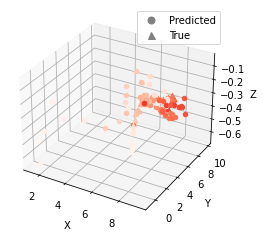

In [ ]:
# Create a 3D scatter plot of the predicted and true values
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
num_points = batch

# Create a colormap for color gradation
cmap = plt.get_cmap('Reds')

for i, (predictValue, trueValue) in enumerate(zip(coordinates, truth)):
    color = cmap(i / num_points)
    ax.scatter(predictValue[0], predictValue[1], predictValue[2], color=color, marker='o')
    ax.scatter(trueValue[0], trueValue[1], trueValue[2], color=color, marker='^')

# Set the limits for each axis
# ax.set_xlim([0, 10])
# ax.set_ylim([0, 10])
# ax.set_zlim([-10, 10])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Create custom legend handles
predicted_handle = mlines.Line2D([], [], color='gray', marker='o', linestyle='', markersize=7, label='Predicted')
true_handle = mlines.Line2D([], [], color='gray', marker='^', linestyle='', markersize=7, label='True')
ax.legend(handles=[predicted_handle, true_handle], loc='upper right')

plt.show()